In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

Using TensorFlow backend.


# Data Preprocessing

In [4]:
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    X_train = x_train.astype('float32')
    X_test = x_test.astype('float32')
    return X_train, y_train, X_test, y_test

def labelencoding(y_train, y_val, y_test, nb_classes):
    Y_val = to_categorical(y_val, num_classes = nb_classes)
    Y_test = to_categorical(y_test, num_classes = nb_classes)
    Y_train = to_categorical(y_train.reshape(-1, 1), num_classes = nb_classes)
    return Y_train, Y_val, Y_test

def split_dataset(X_train, Y_train):

    # Set the random seed
    random_seed = 2

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)
    
    return X_train, X_val, Y_train, Y_val

In [5]:
CLASSES = 10
X_train, Y_train, X_test, Y_test = load_data()
X_train, X_val, Y_train, Y_val = split_dataset(X_train, Y_train)
Y_train, Y_val, Y_test = labelencoding(Y_train, Y_val, Y_test, CLASSES)

### Image to vector and vector normalization

In [6]:
vector_shape = 32*32*3

X_train = X_train.reshape(-1, vector_shape)
X_train = X_train / 255.

X_val = X_val.reshape(-1, vector_shape)
X_val = X_val / 255.

X_test = X_test.reshape(-1, vector_shape)
X_test = X_test / 255.

# Model: Multilayer Perceptron (MLP) for multi-class classification

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(vector_shape,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Model compilation

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training

In [9]:
BATCH_SIZE = 64
EPOCHS = 80
history = model.fit(X_train, Y_train, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, Y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/80
40000/40000 [==============================] - 2s 51us/step - loss: 2.2654 - acc: 0.1414 - val_loss: 2.1719 - val_acc: 0.2310
Epoch 2/80
40000/40000 [==============================] - 2s 48us/step - loss: 2.1868 - acc: 0.1839 - val_loss: 2.0873 - val_acc: 0.2707
Epoch 3/80
40000/40000 [==============================] - 2s 46us/step - loss: 2.1303 - acc: 0.2021 - val_loss: 2.0071 - val_acc: 0.2954
Epoch 4/80
40000/40000 [==============================] - 2s 44us/step - loss: 2.0927 - acc: 0.2183 - val_loss: 1.9998 - val_acc: 0.3106
Epoch 5/80
40000/40000 [==============================] - 2s 44us/step - loss: 2.0626 - acc: 0.2332 - val_loss: 1.9398 - val_acc: 0.3333
Epoch 6/80
40000/40000 [==============================] - 2s 43us/step - loss: 2.0325 - acc: 0.2457 - val_loss: 1.9208 - val_acc: 0.3435
Epoch 7/80
40000/40000 [==============================] - 2s 44us/step - loss: 2.0102 - acc: 0.2549 - val_loss: 1.9035 - val_acc

40000/40000 [==============================] - 2s 41us/step - loss: 1.7594 - acc: 0.3642 - val_loss: 1.6536 - val_acc: 0.4240
Epoch 61/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7523 - acc: 0.3676 - val_loss: 1.6578 - val_acc: 0.4261
Epoch 62/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7556 - acc: 0.3620 - val_loss: 1.6527 - val_acc: 0.4234
Epoch 63/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7523 - acc: 0.3649 - val_loss: 1.6356 - val_acc: 0.4313
Epoch 64/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7503 - acc: 0.3623 - val_loss: 1.6326 - val_acc: 0.4312
Epoch 65/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7512 - acc: 0.3659 - val_loss: 1.6543 - val_acc: 0.4186
Epoch 66/80
40000/40000 [==============================] - 2s 41us/step - loss: 1.7493 - acc: 0.3670 - val_loss: 1.6435 - val_acc: 0.4279
Epoch 67/80
40000/40000 [=====================

## Learning Curves

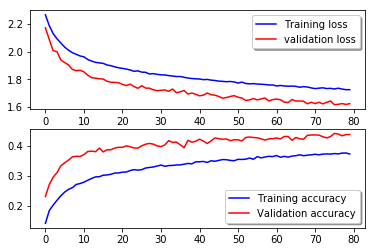

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

## Predict

In [11]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

## Metrics

In [12]:
Y_true = np.argmax(Y_test, axis=1)
print("Accuracy: {}".format(accuracy_score(Y_true, predictions)))
print("Recall: {}".format(recall_score(Y_true, predictions, average=None)))
print("Precision: {}".format(precision_score(Y_true, predictions, average=None)))
print("F1: {}".format(f1_score(Y_true, predictions, average=None)))

Accuracy: 0.4346
Recall: [ 0.426  0.493  0.012  0.246  0.471  0.369  0.638  0.511  0.587  0.593]
Precision: [ 0.50533808  0.61548065  0.18181818  0.3003663   0.33099086  0.3667992
  0.39924906  0.50344828  0.51763668  0.45791506]
F1: [ 0.46228974  0.54747363  0.02251407  0.27047828  0.38877425  0.36789631
  0.49114704  0.50719603  0.55014058  0.5167756 ]
